In [1]:
from matplotlib import animation
from from_wave import *

save_path = "../plots"

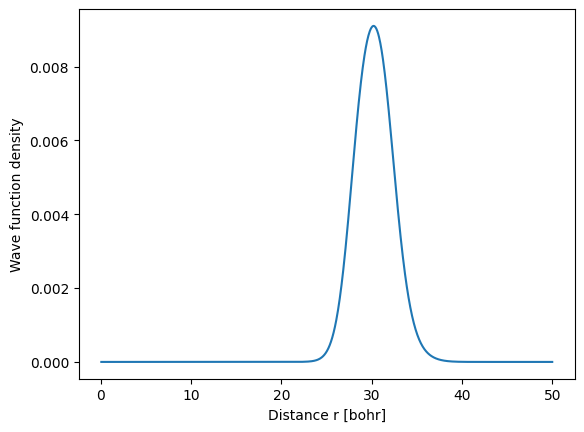

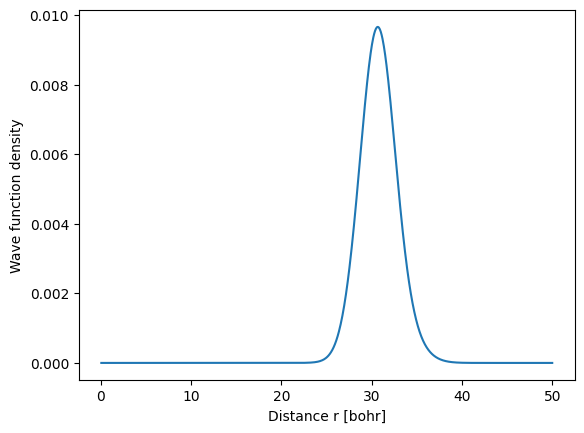

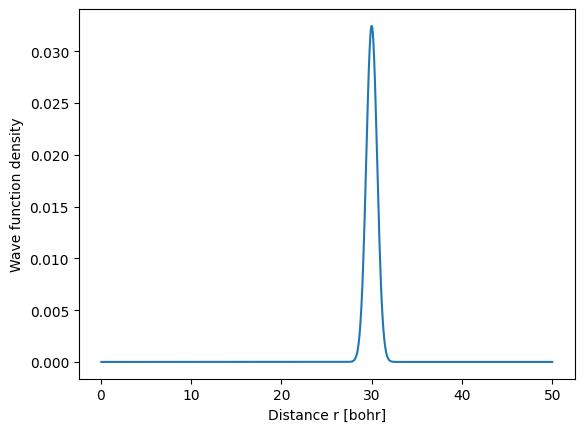

In [4]:
anim = distance_animation("coriolis_0_0")
anim.save(f'{save_path}/coriolis_0_0_distance_animation.gif', writer="pillow", fps=30)

anim = distance_animation("coriolis_1_0")
anim.save(f'{save_path}/coriolis_1_0_distance_animation.gif', writer="pillow", fps=30)

anim = distance_animation("coriolis_1_1")
anim.save(f'{save_path}/coriolis_1_1_distance_animation.gif', writer="pillow", fps=30)

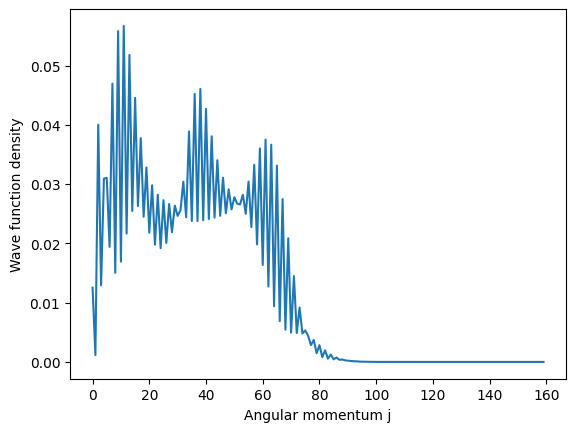

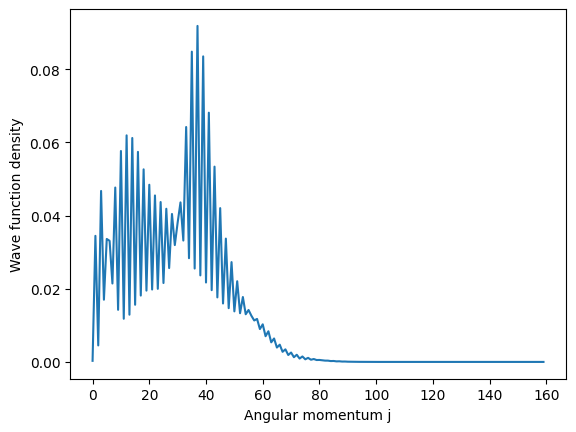

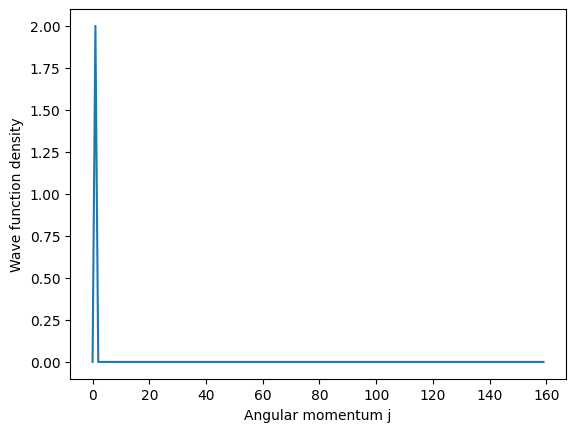

In [5]:
anim = angular_animation("coriolis_0_0")
anim.save(f'{save_path}/coriolis_0_0_angular_animation.gif', writer="pillow", fps=30)

anim = angular_animation("coriolis_1_0")
anim.save(f'{save_path}/coriolis_1_0_angular_animation.gif', writer="pillow", fps=30)

anim = angular_animation("coriolis_1_1")
anim.save(f'{save_path}/coriolis_1_1_angular_animation.gif', writer="pillow", fps=30)

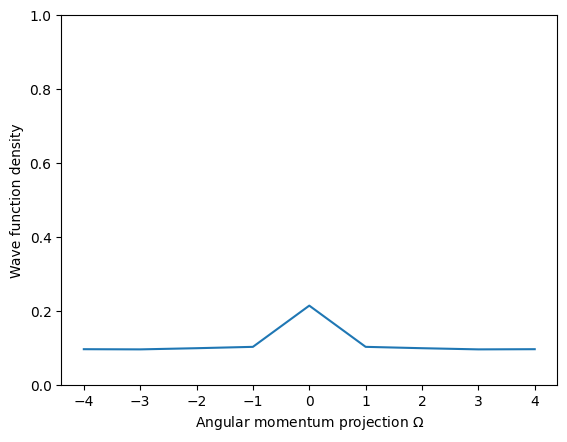

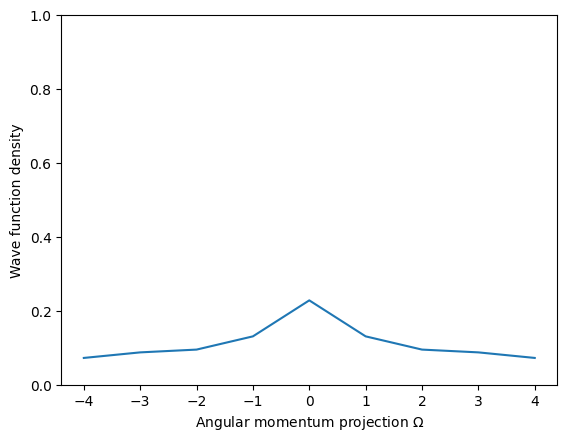

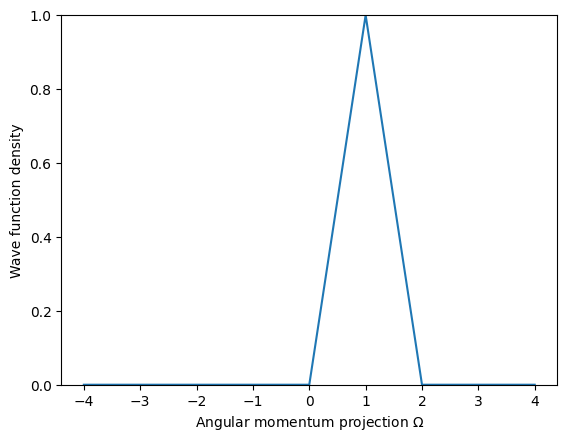

In [2]:
anim = omega_animation("coriolis_0_0")
anim.save(f'{save_path}/coriolis_0_0_omega_animation.gif', writer="pillow", fps=30)

anim = omega_animation("coriolis_1_0")
anim.save(f'{save_path}/coriolis_1_0_omega_animation.gif', writer="pillow", fps=30)

anim = omega_animation("coriolis_1_1")
anim.save(f'{save_path}/coriolis_1_1_omega_animation.gif', writer="pillow", fps=30)

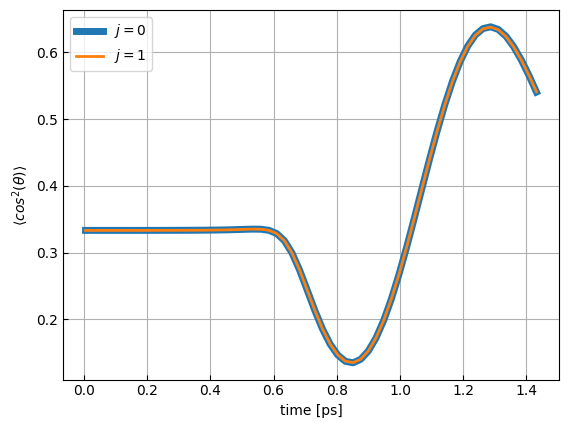

In [4]:
fig, ax = alignements("coriolis", [0, 1])
ax.lines[0].set_linewidth(5)
ax.lines[1].set_linewidth(2)
ax.legend()

pass

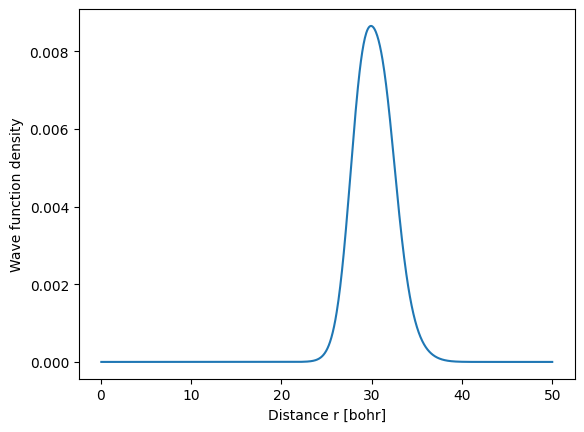

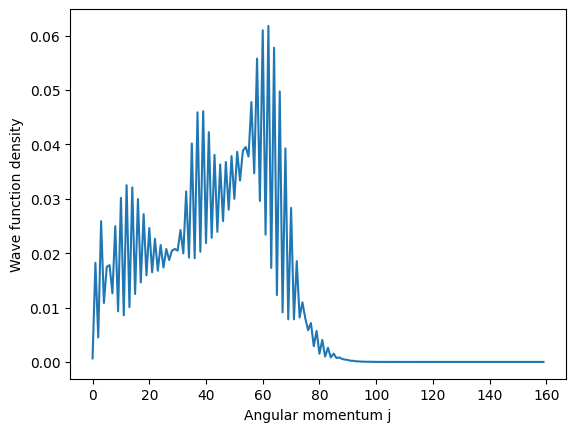

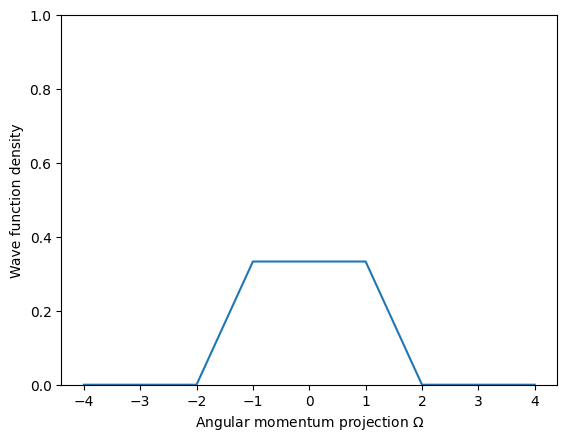

In [8]:
anim = distance_animation("coriolis_1")
anim.save(f'{save_path}/coriolis_1_distance_animation.gif', writer="pillow", fps=30)

anim = angular_animation("coriolis_1")
anim.save(f'{save_path}/coriolis_1_angular_animation.gif', writer="pillow", fps=30)

anim = omega_animation("coriolis_1")
anim.save(f'{save_path}/coriolis_1_omega_animation.gif', writer="pillow", fps=30)

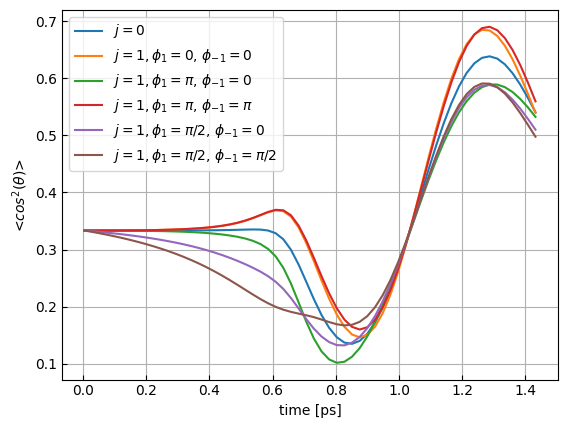

In [3]:
fig, ax = alignement_mixed_phases("coriolis", ["0_0", "pi_0", "pi_pi", "hpi_0", "hpi_hpi"])
ax.legend()

fig.savefig(f"{save_path}/coriolis_phases.pdf")

pass

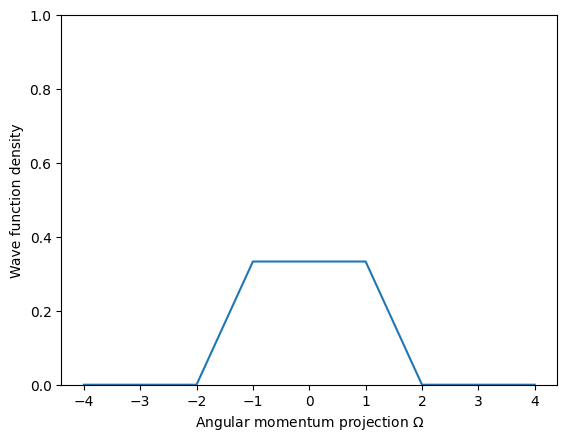

In [10]:
anim = omega_animation("coriolis_1_phase_hpi_hpi")
anim.save(f'{save_path}/coriolis_1_phase_animation.gif', writer="pillow", fps=30)

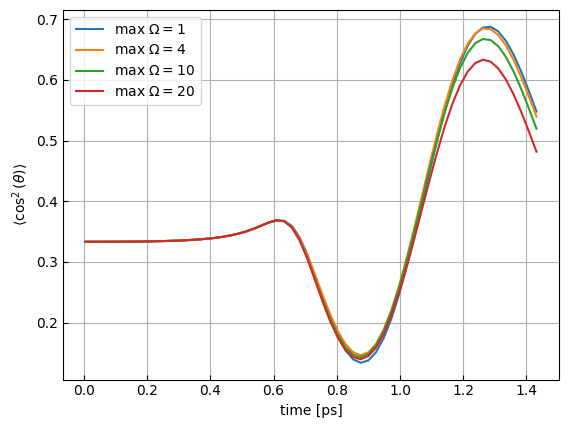

In [6]:
fig, ax = plt.subplots()
ax.grid()
ax.tick_params(which='both', direction="in")
ax.set_xlabel('time [ps]')
ax.set_ylabel('$\\left<\\cos^2(\\theta)\\right>$')

for omega_max in [1, 4, 10, 20]:
    time, alignment = alignment_from_wave(path, f"coriolis_1_phase_coriolis_omega_max_{omega_max}")
    ax.plot(time, alignment, label = f"max $\\Omega = {omega_max}$")
ax.legend()

fig.savefig(f"{save_path}/coriolis_phases_convergence.pdf")

pass

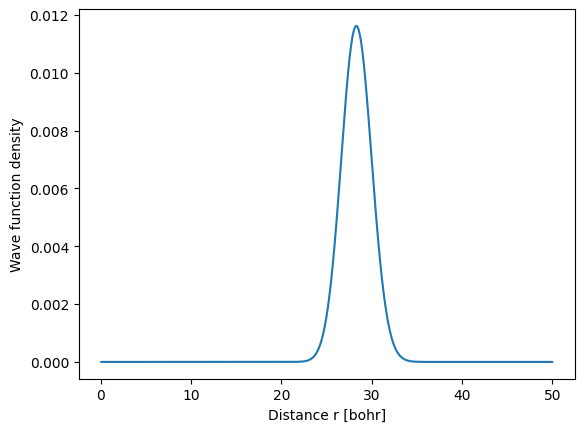

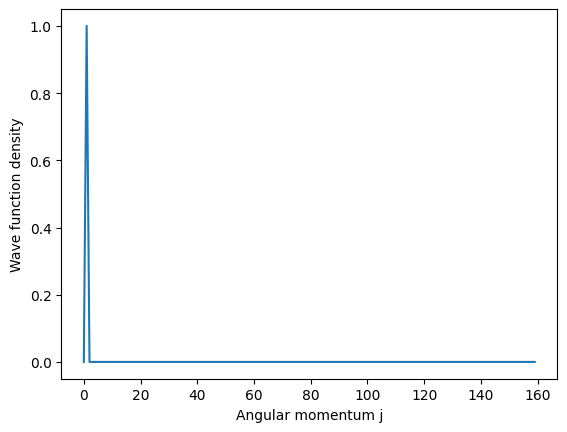

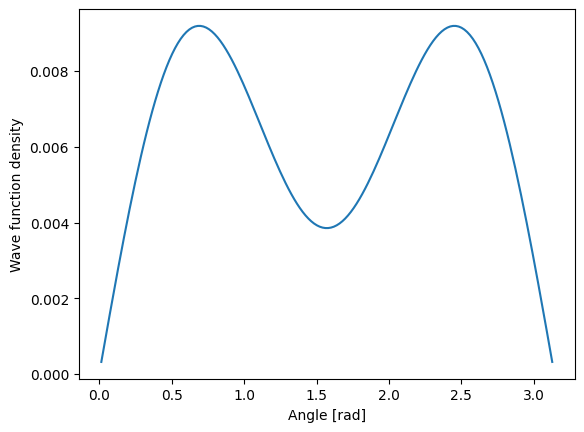

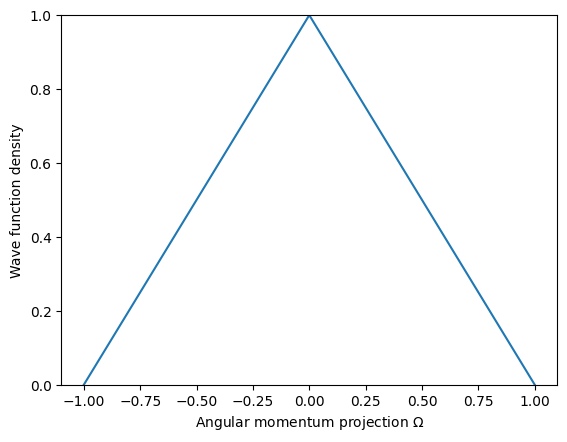

In [19]:
anim = distance_animation("free_coriolis")
anim.save(f'{save_path}/free_coriolis_distance_animation.gif', writer="pillow", fps=30)

anim = angular_animation("free_coriolis")
anim.save(f'{save_path}/free_coriolis_angular_animation.gif', writer="pillow", fps=30)

anim = polar_animation("free_coriolis")
anim.save(f'{save_path}/free_coriolis_polar_animation.gif', writer="pillow", fps=30)

anim = omega_animation("free_coriolis")
anim.save(f'{save_path}/free_coriolis_omega_animation.gif', writer="pillow", fps=30)

In [1]:
from from_result import *
mass = 27535.24841189485
energy_kelvin = 3700
energy = energy_kelvin * 3.1668105e-6

In [12]:
j_init = 0

losses = read_losses(f"{path}/coriolis_losses_{energy_kelvin}_{j_init}.dat")
Js = losses[1:, 0]
BSigma_losses = losses[1:, 1]
XPi_losses = losses[1:, 2]

xpi_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, 0, Js, XPi_losses)
xpi_cross_sect = calc_cross_section(Js, xpi_part_cross_sect)
xpi_react_rate = calc_reaction_rate(mass, energy, xpi_cross_sect)

bsigma_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, 0, Js, BSigma_losses)
bsigma_cross_sect = calc_cross_section(Js, bsigma_part_cross_sect)
bsigma_react_rate = calc_reaction_rate(mass, energy, bsigma_cross_sect)

xpi_react_rate_0 = xpi_react_rate
bsigma_react_rate_0 = bsigma_react_rate

print("XPi reaction rate: ", xpi_react_rate_0)
print("A + B reaction rate: ", bsigma_react_rate_0)

XPi reaction rate:  2.468243902149411e-10
A + B reaction rate:  6.154082160741011e-10


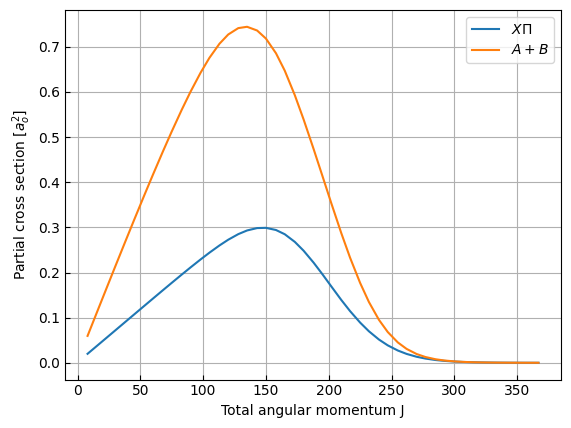

In [13]:
fig, ax = utility.plot()

ax.plot(Js, xpi_part_cross_sect, label="$X \Pi$")
ax.plot(Js, bsigma_part_cross_sect, label="$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend()

In [14]:
j_init = 1

losses = read_losses(f"{path}/coriolis_losses_{energy_kelvin}_{j_init}.dat")
Js = losses[:, 0]
BSigma_losses = losses[:, 1]
XPi_losses = losses[:, 2]

xpi_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, 2 * j_init, Js, XPi_losses)
xpi_cross_sect = calc_cross_section(Js, xpi_part_cross_sect)
xpi_react_rate = calc_reaction_rate(mass, energy, xpi_cross_sect)

bsigma_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, 2 * j_init, Js, BSigma_losses)
bsigma_cross_sect = calc_cross_section(Js, bsigma_part_cross_sect)
bsigma_react_rate = calc_reaction_rate(mass, energy, bsigma_cross_sect)

xpi_react_rate_1 = xpi_react_rate
bsigma_react_rate_1 = bsigma_react_rate

print("XPi reaction rate: ", xpi_react_rate_1)
print("A + B reaction rate: ", bsigma_react_rate_1)

XPi reaction rate:  2.5315183668034726e-10
A + B reaction rate:  6.661453690530443e-10


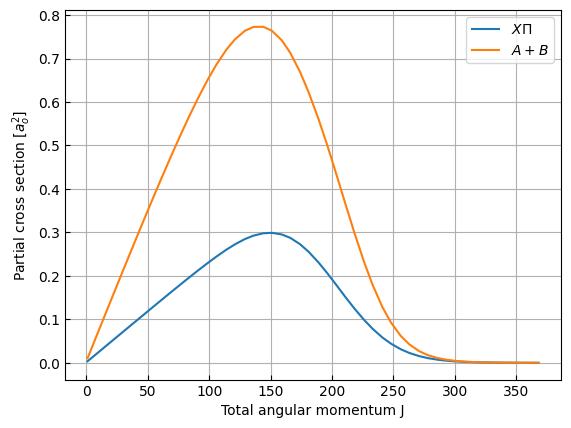

In [15]:
fig, ax = utility.plot()

ax.plot(Js, xpi_part_cross_sect, label="$X \Pi$")
ax.plot(Js, bsigma_part_cross_sect, label="$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend()

In [17]:
print(f"Total reaction rate for j=0:")
print(f"xpi: {xpi_react_rate_0}")
print(f"A+B: {bsigma_react_rate_0}")
print()
print(f"Total reaction rate for j=1:")
print(f"xpi: {xpi_react_rate_1}")
print(f"A+B: {bsigma_react_rate_1}")
print()
print(f"Ratios j=1 to j=0:")
print(f"xpi: {xpi_react_rate_1/xpi_react_rate_0}")
print(f"A+B: {bsigma_react_rate_1/bsigma_react_rate_0}")

Total reaction rate for j=0:
xpi: 2.468243902149411e-10
A+B: 6.154082160741011e-10

Total reaction rate for j=1:
xpi: 2.5315183668034726e-10
A+B: 6.661453690530443e-10

Ratios j=1 to j=0:
xpi: 1.0256354182011593
A+B: 1.082444711743715
